# Universidade Federal do Rio Grande do Norte
# Instituto Metrópole Digital
# Docente: Ivanovitch Silva
# Discente: Rafael Costa Varela

# Visualização gráfica de dados

Neste notebook, construiremos alguns gráficos a partir de dados das eleições presidenciais de 2018.

# Importando bibliotecas

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Carregando os dados

In [165]:
def load_csv(csv_file):
    """
    Produz um DataFrame Pandas, utilizando como caractere separador o ponto-e-vírgula,
    e o latin-1 (ISO-8859-1) como sistema de codificação de caracteres, de acordo com
    as instruções dadas.
    """
    return pd.read_csv(csv_file, sep=";", encoding="ISO-8859-1")

votacao_br = load_csv('votacao_candidato_munzona_2018_BR.csv')
votacao_rn = load_csv('votacao_candidato_munzona_2018_RN.csv')

# Análise

Uma primeira pergunta que se pode fazer é: Quantos municípios de cada estado estão representados nestes dados? A resposta segue no gráfico a seguir:

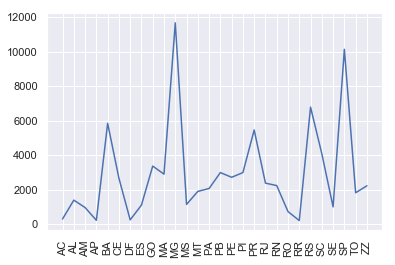

In [119]:
%matplotlib inline

# Produz um DataFrame constando quantas vezes cada estado está representado
contagens = votacao_br['SG_UF'].value_counts()
# Rotaciona os labels do eixo x em 90º, para evitar sobreposição
plt.xticks(rotation=90)
# Plota os dados em gráfico de linhas
sns.lineplot(data=contagens)

#### Gráfico 1: distribuição de municípios por estado

Existe uma crença popular de que o estado de Minas Gerais é decisivo em resultados de eleições. Um primeiro indicativo pode ser visto acima: é o estado com mais municípios.

Vamos verificar agora as distribuições de votos por candidato nos estados de Minas Gerais e São Paulo.

In [188]:
def filtra_por_estado(df, estado):
    """
    Retorna os registros referentes a um estado específico
    """
    return df['SG_UF'] == estado


def filtra_por_candidato(df, candidato):
    return df['NM_CANDIDATO'] == candidato


minas_gerais = filtra_por_estado(votacao_br, 'MG')
sao_paulo = filtra_por_estado(votacao_br, 'SP')

for candidato in votacao_br['NM_CANDIDATO'].sort_values().unique():
    candidato_filtrado = filtra_por_candidato(votacao_br, candidato)
    display(votacao_br[minas_gerais, candidato_filtrado])

"""
display(votacao_br[sao_paulo]['NM_CANDIDATO'].value_counts())
print('-------------------------------')
display(votacao_br[minas_gerais]['NM_CANDIDATO'].value_counts())
"""

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Conforme é possível observar, em cada estado as quantidades de votos são as mesmas para todos os candidatos. Vamos verificar então, quantos votos foram computados em cada estado.

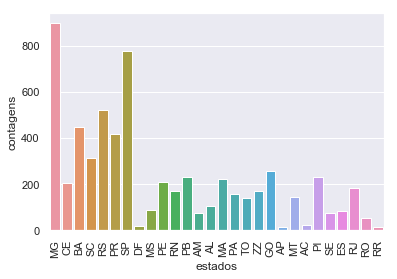

In [166]:
"""
Para montar o gráfico abaixo, são definidos dois vetores: um com os estaods, e outro com as contagens
de votos em cada estado.
"""
estados = []
contagens = []

for estado in votacao_br['SG_UF'].unique():
    estados.append(estado) # adiciona o estado
    estado_filtrado = filtra_por_estado(votacao_br, estado)
    # Adiciona as contagens de votos em cada estado
    contagens.append(votacao_br[estado_filtrado]['NM_CANDIDATO'].value_counts()[0])

contagens_de_votos = pd.DataFrame({'estados': estados, 'contagens': contagens}, index=estados)
plt.xticks(rotation=90)
# Plota os dados em gráfico de linhas
sns.barplot(x='estados', y='contagens', data=contagens_de_votos)

#### Gráfico 2: distribuição de votos por estado

Novamente os padrões se repetem: conforme é possível observar, Minas Gerais continua sendo detentora do maior número de votos.

In [170]:
display(votacao_br[sao_paulo][['NM_CANDIDATO', 'QT_VOTOS_NOMINAIS']].head())


,NM_CANDIDATO,QT_VOTOS_NOMINAIS
6,CIRO FERREIRA GOMES,7612
9,JOÃO VICENTE FONTELLA GOULART,0
10,FERNANDO HADDAD,1089
13,MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA,72
18,MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA,17
